<a href="https://colab.research.google.com/github/plapenamanero/trumao_2021/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook for data analysis and figure creation for the paper:

**Experimental investigation on the influence of oven drying on volcanic ash derived soils geotecthnical properties**

Authors:

* Romero-Mancilla, Pablo Eduardo
* Montenegro-Cooper, José Miguel
* King, Robert
* [Lapeña-Mañero, Pablo](mailto:plapenamanero@gmail.com)*
* García-Casuso, Carmen

The notebook was created using Google Colab, but it should run on any Jupyter notebook installation with the appropiate packages installed. The following packages are used:

*   Pandas (1.1.5)
*   NumPy (1.19.5)
*   Matplotlib (3.2.2)
*   SciPy (1.4.1)
*   IPython (5.5.0)

(All dependencies are installed on Google Colab by default)

CONTACT:

*plapenamanero@gmail.com




# Setup

In [5]:
#@title Configuration 
# Form option only vailable in Colab
#@markdown Options
# generate pdf for figures?
generate_pdf = True #@param {type: 'boolean'}
# generate zip file with all figures
generate_zip = True #@param {type: 'boolean'}

#@markdown for further configuration see code

# removes sample_data default_folder
!rm -rf sample_data

# neccesary imports fromm standard library
import os
import shutil
import math
from collections import OrderedDict
import requests
import urllib.request
from urllib.parse import urlparse
import json

# additional package import
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, ticker as mticker, colors as mcolors
import matplotlib
from scipy import stats
from IPython.display import Image

#figure size configuratios
cm = 1/2.54
large_fig = (17*cm, 11.5*cm)
medium_fig = (13.8*cm, 9*cm)
small_fig = (6.77*cm, 6.77*cm)

# figure font size configuration
font = {'family' : 'sans-serif',
        'weight' : 'regular',
        'size'   : 7}
matplotlib.rc('font', **font)

# removes pdfs from main folder
file_list = [f for f in os.listdir('.') if os.path.isfile(f)]
for file in file_list:
    if os.path.splitext(file)[1] == '.pdf':
        os.remove(file)

# folder to save figures
save_folder = 'figures'
# removes folder and its contents if already exists
shutil.rmtree(save_folder, ignore_errors=True)
# creates de folder
os.mkdir(save_folder)
# stores de path to save pdfs
current_path = os.getcwd()
save_path = os.path.join(current_path, save_folder)
# stores the zip name
save_zip = save_folder + '.zip'
# removes the zip if already existis
! rm -rf $save_zip

# Loads file_list from Github
github_repo = 'https://github.com/plapenamanero/trumao_2021/raw/main/'
github_repo_res = github_repo +  'resources/'
github_repo_fl = github_repo_res + 'git_hub_files.json'
with urllib.request.urlopen(github_repo_fl) as url:
    file_list = json.loads(url.read().decode())

# Loads data file
data = pd.ExcelFile(file_list['excel_file'])
del file_list['excel_file']

# Loads figures from Github
for figure_name, figure_url in file_list.items():
    raw_data = requests.get(figure_url)
    url = urlparse(figure_url)
    output_path = os.path.join(save_path, os.path.basename(url.path))
    with open(output_path, 'wb') as output:
        output.write(raw_data.content)

print('Ready')

Ready


# Figure 3: Casagrande apparatus results


--- Undisturbed fit ---
w = -16.20322181186978*log(hits) + 132.83116311567153
wl = 110.0
R^2: 0.5662885805764368

--- Oven-dried fit ---
w = -8.974329924507826*log(hits) + 74.47048083361126
wl = 62.0
R^2: 0.6206683619865833

--- Figure saved to pdf on /content/figures/figure_03.pdf ---

--- Figure preview ---



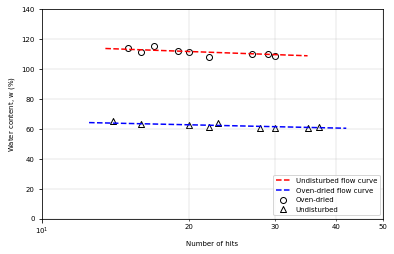

In [6]:
# figure configuration
figure_name = 'figure_03.pdf'
figure_path = os.path.join(save_path, figure_name)
fig_3, ax_3 = plt.subplots(figsize=medium_fig)

# gets classification data from file
cg_data = pd.read_excel(data, 'casagrande')
# splits data on oven¡dried (a) and undisturbed (u)
cg_data_a = cg_data[cg_data['type'] == 'a']
cg_data_u = cg_data[cg_data['type'] == 'u']

# plots results for undisturbed samples
ax_3.scatter(cg_data_u['hits'], cg_data_u['w'],
             label = 'Oven-dried',
             marker='o',
             facecolors='white',
             edgecolors='k',
             color = 'k')

# plots results for oven dried samples
ax_3.scatter(cg_data_a['hits'], cg_data_a['w'],
           label='Undisturbed',
           marker='^',
           facecolors='white',
           edgecolors='k',
           color = 'k')

# Regressions
# Undisturbed
extra = 5
reg_u = stats.linregress(np.log10(cg_data_u['hits']), cg_data_u['w'])
plot_reg_u_hits = [min(cg_data_u['hits']) - 1.5, max(cg_data_u['hits']) + extra]
plot_reg_u_w = [reg_u.intercept + min(np.log10(cg_data_u['hits'])) * reg_u.slope,
                  reg_u.intercept + max(np.log10(cg_data_u['hits'])) * reg_u.slope]
ax_3.plot(plot_reg_u_hits, plot_reg_u_w,'--r',label='Undisturbed flow curve')
wl_u = reg_u.slope * (np.log10(25)) + reg_u.intercept
print('\n--- Undisturbed fit ---')
print('w = {}*log(hits) + {}'.format(reg_u.slope, reg_u.intercept))
print('wl = {}'.format(round(wl_u,0)))
print('R^2: {}'.format(reg_u.rvalue**2))

# Oven dried
extra = 5
reg_a = stats.linregress(np.log10(cg_data_a['hits']), cg_data_a['w'])
plot_reg_a_hits = [min(cg_data_a['hits']) - 1.5, max(cg_data_a['hits']) + extra]
plot_reg_a_w = [reg_a.intercept + min(np.log10(cg_data_a['hits'])) * reg_a.slope,
                  reg_a.intercept + max(np.log10(cg_data_a['hits'])) * reg_a.slope]
ax_3.plot(plot_reg_a_hits, plot_reg_a_w,'--b', label='Oven-dried flow curve')
wl_a = reg_a.slope * (np.log10(25)) + reg_a.intercept
print('\n--- Oven-dried fit ---')
print('w = {}*log(hits) + {}'.format(reg_a.slope, reg_a.intercept))
print('wl = {}'.format(round(wl_a, 0)))
print('R^2: {}'.format(reg_a.rvalue**2))

# Configures figure aspect
ax_3.set(xlim = [10,50],
         ylim = [0, 140],
         xscale = 'log',
         ylabel='Water content, w $(\%)$',
         xlabel='Number of hits',
         xticks=[10, 20, 25, 30, 40, 50])

fig_3.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)

# shows major and minor grids
ax_3.xaxis.set_minor_formatter(mticker.ScalarFormatter())
ax_3.grid(which='major', linewidth=0.3)
ax_3.grid(which='minor', linewidth=0.3)

# shows legend
ax_3.legend(loc='lower right')

if generate_pdf:
    fig_3.savefig(figure_path)
    print('\n--- Figure saved to pdf on {} ---'.format(figure_path))
else:
    print('\n--- PDF saving deactivated ---'.format(figure_path))
    
print('\n--- Figure preview ---\n')
fig_3.show()

# Figure 4: Boxplot cone results


--- Figure saved to pdf on /content/figures/figure_04.pdf ---

--- Figure preview ---



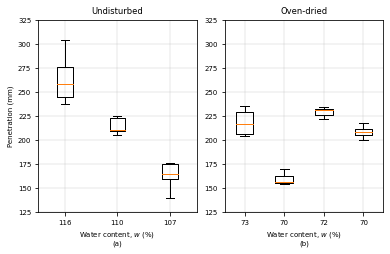

In [7]:
# figure configuration
figure_name = 'figure_04.pdf'
figure_path = os.path.join(save_path, figure_name)
fig_4, ax_4 = plt.subplots(1, 2, figsize=medium_fig)

# gets classification data from file
cone_data = pd.read_excel(data, 'cone')
# splits data in undisturbed and oven dried
cone_data_u = cone_data[cone_data['type'] == 'u']
cone_data_a = cone_data[cone_data['type'] == 'a']

# Undisturved samples
sample_u_list = cone_data_u['sample'].unique()
data_u = []
plot_data_u = []
w_c_u = []
for sample in sample_u_list:
    pen = cone_data_u[cone_data_u['sample'] == sample]['penetration']
    w_c_u.append(int(np.round(cone_data_u[cone_data_u['sample'] == sample]['w'].unique(), decimals=0)))
    plot_data_u.append(pen)
plot_data_u = np.array(plot_data_u, dtype=object)   
ax_4[0].boxplot(plot_data_u, zorder=100)

# Ovendried samples
sample_a_list = cone_data_a['sample'].unique()
plot_data_a = []
w_c_a = []
for sample in sample_a_list:
    pen = cone_data_a[cone_data_a['sample'] == sample]['penetration']
    w_c_a.append(int(np.round(cone_data_a[cone_data_a['sample'] == sample]['w'].unique(), decimals=0)))
    plot_data_a.append(pen)
plot_data_a = np.array(plot_data_a, dtype=object)    
ax_4[1].boxplot(plot_data_a, zorder=100)

# configures undisturbed axes
ax_4[0].set(ylim = [125, 325],
          title='Undisturbed',
          ylabel = 'Penetration (mm)',
          xlabel = 'Water content, $w$ ($\%$)\n(a)',
          xticklabels = w_c_u)

# configures oven dried axes
ax_4[1].set(ylim = [125, 325],
          title='Oven-dried',
          xlabel='Water content, $w$ ($\%$)\n(b)',
          xticklabels = w_c_a)

# configures figure aspect
ax_4[0].grid(linewidth=0.3)
ax_4[1].grid(linewidth=0.3)
plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)

if generate_pdf:
    fig_4.savefig(figure_path)
    print('\n--- Figure saved to pdf on {} ---'.format(figure_path))
else:
    print('\n--- PDF saving deactivated ---'.format(figure_path))

print('\n--- Figure preview ---\n')
fig_4.show()

# Figure 5: Cone fall aparatus results


--- Undisturbed fit ---
w = 0.8818416636957858*penetration + 91.98491689143704
wl = 110.0
R^2 (undisturbed): 0.9622206712230298

--- Oven dried fit ---
w = 0.29748147990762397*penetration + 65.16593103331275
wl = 83.0
R^2 (undisturbed): 0.3452057919466503

--- Figure saved to pdf on /content/figures/figure_05.pdf ---

--- Figure preview ---



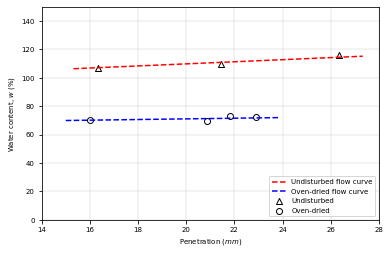

In [8]:
# figure configuration
figure_name = 'figure_05.pdf'
figure_path = os.path.join(save_path, figure_name)
fig_5, ax_5 = plt.subplots(figsize=medium_fig)

# gets classification data from file
cone_data = pd.read_excel(data, 'cone')
# splits data in undisturbed and oven dried
cone_data_u = cone_data[cone_data['type'] == 'u']
cone_data_a = cone_data[cone_data['type'] == 'a']

# Undisturbed samples 
pen_data_u = []
w_data_u = []
sample_u_list = cone_data_u['sample'].unique()
for sample in sample_u_list:
    pen = (cone_data_u[cone_data_u['sample'] == sample]['penetration']) / 10
    w = cone_data_u[cone_data_u['sample'] == sample]['w'].mean()
    pen_data_u.append(np.mean(pen))
    w_data_u.append(w)

ax_5.scatter(pen_data_u, w_data_u,
           label='Undisturbed',
           marker='^',
           facecolors='white',
           edgecolors='k',
           color = 'k')

# Oven dried samples
pen_data_a = []
w_data_a = []
sample_a_list = cone_data_a['sample'].unique()
for sample in sample_a_list:
    pen = (cone_data_a[cone_data_a['sample'] == sample]['penetration']) / 10
    w = cone_data_a[cone_data_a['sample'] == sample]['w'].mean()
    pen_data_a.append(np.mean(pen))
    w_data_a.append(w)

ax_5.scatter(pen_data_a, w_data_a,
           label='Oven-dried',
           marker='o',
           facecolors='white',
           edgecolors='k',
           color = 'k')

# Regressions
# Unaltered
extra = 1
reg_u = stats.linregress(pen_data_u, w_data_u)
plot_reg_u_pen = [min(pen_data_u) - extra, max(pen_data_u) + extra]
plot_reg_u_w = [reg_u.intercept + min(pen_data_u) * reg_u.slope,
                  reg_u.intercept + max(pen_data_u) * reg_u.slope]
ax_5.plot(plot_reg_u_pen, plot_reg_u_w, '--r', label='Undisturbed flow curve')
wl_u = reg_u.slope * (20) + reg_u.intercept

print('\n--- Undisturbed fit ---')
print('w = {}*penetration + {}'.format(reg_u.slope, reg_u.intercept))
print('wl = {}'.format(round(wl_u, 0)))
print('R^2 (undisturbed): {}'.format(reg_u.rvalue**2))

# Oven dried
extra = 1
reg_a = stats.linregress(pen_data_a, w_data_a)
plot_reg_a_pen = [min(pen_data_a) - extra, max(pen_data_a) + extra]
plot_reg_a_w = [reg_a.intercept + min(pen_data_a) * reg_a.slope,
                  reg_a.intercept + max(pen_data_a) * reg_a.slope]
ax_5.plot(plot_reg_a_pen, plot_reg_a_w,'--b', label='Oven-dried flow curve')
wl_a = reg_u.slope * (20) + reg_a.intercept

print('\n--- Oven dried fit ---')
print('w = {}*penetration + {}'.format(reg_a.slope, reg_a.intercept))
print('wl = {}'.format(round(wl_a, 0)))
print('R^2 (undisturbed): {}'.format(reg_a.rvalue**2))

# configures figure aspect
ax_5.grid(linewidth=0.3)
ax_5.set(xlim = [14, 28],
       ylim = [0,150],
       xlabel = 'Penetration $(mm)$',
       ylabel = 'Water content, $w$ $(\%)$')
fig_5.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
ax_5.legend(loc='lower right')

if generate_pdf:
    fig_5.savefig(figure_path)
    print('\n--- Figure saved to pdf on {} ---'.format(figure_path))
else:
    print('\n--- PDF saving deactivated ---'.format(figure_path))

print('\n--- Figure preview ---\n')
fig_5.show()

# Figure 6: Plastic limit results

--- Plastic limit ---
Undisturbed sample -> wp = 80.0
Oven-dried sample -> wp = 58.0

--- Figure saved to pdf on /content/figures/figure_06.pdf ---

--- Figure preview ---



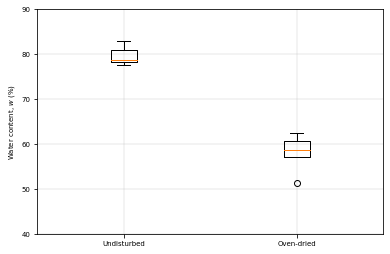

In [9]:
# figure configuration
figure_name = 'figure_06.pdf'
figure_path = os.path.join(save_path, figure_name)
fig_6, ax_6 = plt.subplots(figsize=medium_fig)

# gets classification data from file
wd_data = pd.read_excel(data, 'wp')
# splits data in undisturbed and oven dried
wd_data_u = wd_data[wd_data['type'] == 'u']['wP']
wd_data_a = wd_data[wd_data['type'] == 'a']['wP']

print('--- Plastic limit ---')
print('Undisturbed sample -> wp = {}'.format(np.round(np.mean(wd_data_u),
                                                      decimals = 0)))
print('Oven-dried sample -> wp = {}'.format(np.round(np.mean(wd_data_a),
                                                     decimals = 0)))

# plots bosplots
data_plot = np.array([wd_data_u, wd_data_a], dtype=object)
ax_6.boxplot(data_plot)

# configures figure aspect
ax_6.grid(linewidth=0.3)
ax_6.set(ylabel = 'Water content, $w$ $(\%)$',
         xticklabels=['Undisturbed', 'Oven-dried'], ylim = [40, 90])
fig_6.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)

if generate_pdf:
    fig_6.savefig(figure_path)
    print('\n--- Figure saved to pdf on {} ---'.format(figure_path))
else:
    print('\n--- PDF saving deactivated ---'.format(figure_path))

print('\n--- Figure preview ---\n')
fig_6.show()

# Figure 7: Plasticity chart


--- Figure saved to pdf on /content/figures/figure_07.pdf ---

--- Figure preview ---



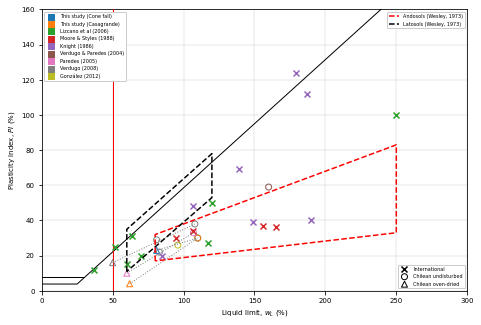

In [10]:
# figure configuration
figure_name = 'figure_07.pdf'
figure_path = os.path.join(save_path, figure_name)
fig_7, ax_7 = plt.subplots(figsize=large_fig)

# gets classification data from file
classification_data = pd.read_excel(data, 'Classification')
# calculates plasticity index for all samples
classification_data['pi_u'] = classification_data['wl_u'] - classification_data['wp_u']
classification_data['pi_a'] = classification_data['wl_a'] - classification_data['wp_a']

# Author lists
study_list = ['This study (Cone fall)', 'This study (Casagrande)']
international_author_list = ['Lizcano et al (2006)', 'Moore and Styles (1988)',
                             'Knight (1986)']
chilean_author_list = ['Verdugo & Paredes (2004)', 'Paredes (2005)',
                       'Verdugo (2008)', 'González (2012)']
author_list = study_list + international_author_list + chilean_author_list
# Color list
color_list = list(mcolors.TABLEAU_COLORS)[0:len(author_list)]
# Color dictionary
color_zip = zip(author_list, color_list)
color_dict = dict(color_zip)
# Symbol dictionary
symbol_dict = {'International':"x",
               'Chilean undisturbed': 'o',
               'Chilean oven-dried':'^'}
               
def plot_unaltered(order=100):
    '''Plots chilean undisturbed data on plasticity charts.'''

    symbol = symbol_dict['Chilean undisturbed']
    # unaltered results for this study
    for test_u in study_list:
        wl_u = classification_data[classification_data['Author'] == test_u]['wl_u']
        pi_u = classification_data[classification_data['Author'] == test_u]['pi_u']
        ax_7.scatter(wl_u, pi_u, marker=symbol, facecolors='none',
                     edgecolors=color_dict[test_u],
                     zorder=order)      

    # chilean reported values
    for author in chilean_author_list:
        wl_u = classification_data[classification_data['Author'] == author]['wl_u']
        pi_u = classification_data[classification_data['Author'] == author]['pi_u']
        ax_7.scatter(wl_u, pi_u,
                     marker=symbol,
                     facecolors='none',
                     edgecolors=color_dict[author],
                     zorder=order)
        
def plot_international(order=100):
    '''Plots international data on plasticity charts.'''

    symbol = symbol_dict['International']  
    # international reported values
    for author in international_author_list:
        wl_u = classification_data[classification_data['Author'] == author]['wl_u']
        pi_u = classification_data[classification_data['Author'] == author]['pi_u']
        ax_7.scatter(wl_u, pi_u,
                   marker=symbol,
                   facecolors=color_dict[author],
                   zorder=order)

def plot_altered(order=100):
    '''Plots chilean oven-dried data on plasticity charts.'''

    symbol = symbol_dict['Chilean oven-dried']
    # oven dried results for this study
    for test_a in study_list:
        wl_a = classification_data[classification_data['Author'] == test_a]['wl_a']
        pi_a = classification_data[classification_data['Author'] == test_a]['pi_a']
        ax_7.scatter(wl_a, pi_a,
                   marker=symbol,
                   facecolors='none',
                   edgecolors=color_dict[test_a],
                   zorder=order)
    # oven dried chilean reported values
    for author in chilean_author_list:
        wl_a = classification_data[classification_data['Author'] == author]['wl_a']
        pi_a = classification_data[classification_data['Author'] == author]['pi_a']
        ax_7.scatter(wl_a, pi_a,
                   marker=symbol,
                   facecolors='none',
                   edgecolors=color_dict[author],
                   zorder=order)

def plot_adjust(order=500):
    '''Plots adjust comparing oven dried and undisturbed.'''

    for test in study_list:
        wl_u = classification_data[classification_data['Author'] == test]['wl_u']
        pi_u = classification_data[classification_data['Author'] == test]['pi_u']

        wl_a = classification_data[classification_data['Author'] == test]['wl_a']
        pi_a = classification_data[classification_data['Author'] == test]['pi_a']

        x_plot = [wl_a, wl_u]
        y_plot = [pi_a, pi_u]

        ax_7.plot(x_plot, y_plot, ':',
                  color='tab:gray',
                  zorder=order,
                  linewidth=1)

    for author in chilean_author_list:
        wl_a = classification_data[classification_data['Author'] == author]['wl_a']
        pi_a = classification_data[classification_data['Author'] == author]['pi_a']
        wl_u = classification_data[classification_data['Author'] == author]['wl_u']
        pi_u = classification_data[classification_data['Author'] == author]['pi_u']
        
        x_plot = [wl_a, wl_u]
        y_plot = [pi_a, pi_u]

        ax_7.plot(x_plot, y_plot, ':',
                  color='tab:gray',
                  zorder=order,
                  linewidth=1)

def add_color_legend(order=1000):
    '''Creates color legend.'''

    plot_list = []
    for key in color_dict:
        key_legend = key.replace(' and ', ' & ')
        plot = ax_7.scatter(-100, -100,
                          marker='s',
                          facecolors=color_dict[key],
                          label=key_legend)
        
        plot_list.append(plot)

    color_legend = ax_7.legend(loc='upper left',
                               shadow=False,
                               fontsize='x-small',
                               handles=plot_list)
    
    color_legend.get_frame().set_alpha(None)
    ax_7.add_artist(color_legend).set_zorder(order)  

def add_symbol_legend(order=1000):
    '''Creates symbol legend.'''

    plot_list = []
    for key in symbol_dict:
        if key == 'International':
            plot = ax_7.scatter(-100, -100,
                                facecolors='k',
                                marker=symbol_dict[key],
                                label=key)
        else:
            plot = ax_7.scatter(-100, -100,
                                facecolors='none',
                                edgecolors='k',
                                marker=symbol_dict[key],
                                label=key)
            
        plot_list.append(plot)

    symbol_legend = ax_7.legend(loc='lower right',
                                shadow=False,
                                fontsize='x-small',
                                handles=plot_list)
    
    symbol_legend.get_frame().set_alpha(None)
    ax_7.add_artist(symbol_legend).set_zorder(order)    

def add_casagrande_chart(max_wl, max_pi, axis, colors=['k', 'r'], order=10, width=1):
    '''Add Casagrande plasticity chat to axis.'''

    # a line
    x_0 = [0, 30]
    y_0 = [8, 8]
    axis.plot(x_0, y_0, colors[0], zorder=order, linewidth = width)
    x_1 = [0, 25, max_wl]
    y_1 = [3.85, 3.85, 0.73*(max_wl - 20)]
    axis.plot(x_1, y_1, colors[0], zorder=order, linewidth = width)

    # 50% moisture line
    x_3 = [50, 50]
    y_3 = [0, max_pi]
    axis.plot(x_3, y_3, colors[1], zorder=order, linewidth = width)

def add_wesley(axis, colors, order = 5):
    '''Add Wesley (1973) data to plasticity chart.'''

    plot_list = []
    andosols_x = [80, 80, 250, 250, 80]
    andosols_y = [17, 32, 83, 33, 17]
    plot, = axis.plot(andosols_x, andosols_y, '--',
                      zorder=order,
                      label='Andosols (Wesley, 1973)',
                      color = colors[0])
    plot_list.append(plot)

    latosols_x = [60, 60, 120, 120, 60]
    latosols_y = [11, 35, 78, 53, 11]
    plot, = axis.plot(latosols_x, latosols_y, '--',
                      zorder=order,
                      label='Latosols (Wesley, 1973)',
                      color = colors[1])
    plot_list.append(plot)
      
    wesley_legend = axis.legend(loc='upper right',
                              shadow=False,
                              fontsize='x-small',
                              handles=plot_list)
    
    wesley_legend.get_frame().set_alpha(None)
    axis.add_artist(wesley_legend).set_zorder(order)    

# defines axis limits
max_wl = 300
max_pi = 160

# adds Casagrande plasticity chart to axis
add_casagrande_chart(max_wl, max_pi, ax_7)

# plots data on axis
plot_unaltered()
plot_altered()
plot_international()
plot_adjust()
add_wesley(ax_7, colors = ['r', 'k'], order = 500)

# adds legends
add_color_legend()
add_symbol_legend()

# adds a line text
''' a line label not shown
text_angle = math.degrees(math.atan(0.77)) + 7 
ax.text(125, 83, 'A line', rotation=text_angle)
'''

# configures figure aspect
ax_7.grid(linewidth=0.3)

ax_7.set(xlim = [0, max_wl],
         ylim = [0, max_pi],
         xlabel = r'Liquid limit, $w_L$ (%)',
         ylabel = r'Plasticity Index, $PI$ (%)')

fig_7.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)

if generate_pdf:
    fig_7.savefig(figure_path)
    print('\n--- Figure saved to pdf on {} ---'.format(figure_path))
else:
    print('\n--- PDF saving deactivated ---'.format(figure_path))

print('\n--- Figure preview ---\n')
fig_7.show()

# Figure 8: Modified Proctor


--- Figure saved to pdf on /content/figures/figure_08.pdf ---

--- Figure preview ---



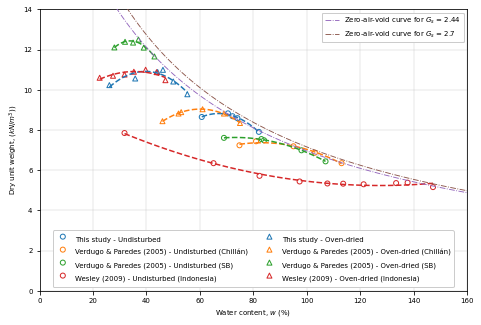

In [11]:
# figure configuration
figure_name = 'figure_08.pdf'
figure_path = os.path.join(save_path, figure_name)
fig_8, ax_8 = plt.subplots(figsize=large_fig)

# gets Modified Proctor data from file
proctor_data = pd.read_excel(data, 'Proctor')
# gets the names of the studies
altered_proctor_list = proctor_data[proctor_data['type'] == 'a']['study'].unique()
unaltered_proctor_list = proctor_data[proctor_data['type'] == 'u']['study'].unique()

def add_saturation_line(g_s, max_w, max_gamma_d, order = 500):
    '''Adds saturation line (Sr = 1) for a given value of  g_s to axis.'''

    gamma_w = 9.81
    gamma_s = g_s * 10
    w = np.linspace(0, max_w, 100)
    gamma_d = gamma_s / (1 + (gamma_s * (w / 100))/(gamma_w))
    saturation_plot = ax_8.plot(w, gamma_d, 'k',
                                zorder = order,
                                label='Saturation line for $G_s$ = {}'.format(g_s))
    
    saturation = ax_8.legend(loc='upper right',
                             shadow=False,
                             fontsize='medium',
                             handles=saturation_plot)
    
    saturation.get_frame().set_alpha(None)
    ax_8.add_artist(saturation).set_zorder(order)

def add_multiple_saturation_lines(g_s_list, max_w, max_gamma_d, colors, order = 500):
    '''Adds multiple saturation lines (Sr = 1) for a given list of g_s to axis.'''
    gamma_w = 9.81
    gamma_s_list = [g_s * gamma_w for g_s in g_s_list]

    w = np.linspace(0, max_w, 100)
    
    gamma_d_list = [gamma_s / (1 + (gamma_s * (w / 100))/(gamma_w)) for gamma_s in gamma_s_list]

    saturation_plot_list = []

    for i, gamma_d in enumerate(gamma_d_list):
        if len(colors) < 1:
            colors = list(mcolors.TABLEAU_COLORS)
            
        plot, = ax_8.plot(w, gamma_d, '-.', color = colors.pop(0),
                          linewidth = 0.9,
                          zorder = order,
                          label='Zero-air-void curve for $G_s$ = {}'.format(g_s_list[i]))
        
        saturation_plot_list.append(plot)

    saturation = ax_8.legend(loc='upper right',
                              shadow=False,
                              handles=saturation_plot_list)
        
    saturation.get_frame().set_alpha(None)

    ax_8.add_artist(saturation).set_zorder(order)

def plot_proctor(w, gamma_d, marker, color, label, order=400):
    '''Plots proctor test.'''

    label = label.replace('Unaltered', 'Undisturbed')
    label = label.replace('Oven Dried', 'Oven-dried')
    label = label.replace('Oven dried', 'Oven-dried')
    label = label.replace(' y ', ' & ')
    ax_8.scatter(w, gamma_d,
                 marker=marker,
                 facecolors='none',
                 edgecolors=color,
                 zorder=order-100,
                 label=label,
                 s=25)
    
    model = np.poly1d(np.polyfit(w, gamma_d, 2))
    x_model = np.linspace(min(w), max(w), 100)
    y_model = model(x_model)
    ax_8.plot(x_model, y_model, '--', color=color, zorder=order)

# configure g_s and axis limits
g_s = 2.7
max_w = 160
max_gamma_d = 14

# plots undisturbed tests
color_list = list(mcolors.TABLEAU_COLORS)
for i, test in enumerate(unaltered_proctor_list):
    gamma_d = proctor_data[proctor_data['study'] == test]['gamma_d']
    w = proctor_data[proctor_data['study'] == test]['w']
    if len(color_list) > 0:
        color = color_list.pop(0)
    else:
        color_list = list(mcolors.TABLEAU_COLORS)
        color = color_list.pop(0)
    plot_proctor(w, gamma_d, 'o', color, test)

# plots oven dried tests
color_list = list(mcolors.TABLEAU_COLORS)
for i, test in enumerate(altered_proctor_list):
    gamma_d = proctor_data[proctor_data['study'] == test]['gamma_d']
    w = proctor_data[proctor_data['study'] == test]['w']
    if len(color_list) > 0:
        color = color_list.pop(0)
    else:
        color_list = list(mcolors.TABLEAU_COLORS)
        color = color_list.pop(0)
    plot_proctor(w, gamma_d, '^', color, test)

# add legend
legend = ax_8.legend(ncol=2,
                     handleheight=2.4,
                     labelspacing=0.05,
                     loc='lower center')
legend.get_frame().set_alpha(None)
ax_8.add_artist(legend).set_zorder(500)

# adds saturation line(s)
# add_saturation_line(g_s, max_w, max_gamma_d)
add_multiple_saturation_lines([2.44, g_s], max_w, max_gamma_d, colors = color_list)

# configures figure aspect
ax_8.grid(linewidth=0.3)
ax_8.set(xlim=[0, max_w],
         ylim=[0, max_gamma_d],
         xlabel=r'Water content, $w$ (%)',
         ylabel=r'Dry unit weight, $(kN/m^3))$')

plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)

if generate_pdf:
    fig_8.savefig(figure_path)
    print('\n--- Figure saved to pdf on {} ---'.format(figure_path))
else:
    print('\n--- PDF saving deactivated ---'.format(figure_path))

print('\n--- Figure preview ---\n')
fig_8.show()

# Figure 9: CBR


--- Figure preview ---



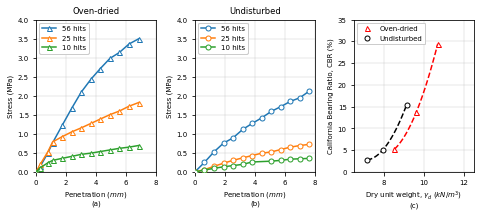

In [12]:
# figure configuration
figure_name = 'figure_09.pdf'
figure_path = os.path.join(save_path, figure_name)
fig_size = [a*b for a,b in zip((1, 2/3),large_fig)]
fig_9, ax_9 = plt.subplots(1, 3, figsize=fig_size)

# gets CBR data from file
cbr_penetration_data = pd.read_excel(data, 'CBR_penetration')
cbr_gamma_d_data = pd.read_excel(data, 'CBR_gamma')

unaltered_data = cbr_penetration_data[cbr_penetration_data['type'] == 'u']
del unaltered_data['type']
altered_data = cbr_penetration_data[cbr_penetration_data['type'] == 'a']
del altered_data['type']

cbr_gamma_d_data['cbr_max'] = cbr_gamma_d_data[['cbr_254', 'cbr_508']].max(axis=1)
altered_gamma_data = cbr_gamma_d_data[cbr_gamma_d_data['type'] == 'a']
unaltered_gamma_data = cbr_gamma_d_data[cbr_gamma_d_data['type'] == 'u']

def plot_cbr_penetration(data, marker, color, axis, order, y_space):
    for hits in list(data['hits'].unique()):
        x = data[data['hits'] == hits]['penetration']
        y = data[data['hits'] == hits]['stress']
        axis.plot(x, y, '-'+marker,
                label= '{} hits'.format(hits),
                markerfacecolor='white',
                markersize = 5,
                zorder=order)
        
def plot_cbr_gamma(data, marker, color, axis, order, label):
    x = data['gamma_d']
    y = data['cbr_max']
    axis.plot(x, y, marker,
                label=label,
                color=color,
                markerfacecolor='white',
                markersize = 5,
                zorder=order)
    
    model = np.poly1d(np.polyfit(x, y, 2))
    x_model = np.linspace(min(x), max(x), 100)
    y_model = model(x_model)
    plt.plot(x_model, y_model, '--', color=color, zorder=order-100)

plot_cbr_penetration(altered_data, '^', 'r', ax_9[0], 500, 0)

plot_cbr_penetration(unaltered_data, 'o', 'k', ax_9[1], 500, 0)

plot_cbr_gamma(altered_gamma_data, '^', 'r', ax_9[2], 500, 'Oven-dried')
plot_cbr_gamma(unaltered_gamma_data, 'o', 'k', ax_9[2], 500, 'Undisturbed')

ax_9[0].set(xlim = [0, 8],
            ylim = [0, 4],
            xlabel = 'Penetration $(mm)$\n(a)',
            ylabel = 'Stress (MPa)',
            title = 'Oven-dried')
ax_9[0].grid(linewidth=0.3)

ax_9[1].set(xlim = [0, 8],
            ylim = [0, 4],
            xlabel = 'Penetration $(mm)$\n(b)',
            ylabel = 'Stress (MPa)',
            title = 'Undisturbed')
ax_9[1].grid(linewidth=0.3)

ax_9[2].set(xlim = [6.5, 12.5],
            ylim = [0, 35],
            xlabel = r'Dry unit weight, $\gamma_d$ $(kN/m^3)$' + '\n(c)',
            ylabel = 'California Bearing Ratio, CBR (%)',
            title = '') 
ax_9[2].grid(linewidth=0.3)

penetration_legend_1 = ax_9[0].legend(loc='upper left',
                                      shadow=False)
    
penetration_legend_1.get_frame().set_alpha(None)
ax_9[0].add_artist(penetration_legend_1).set_zorder(1000)

penetration_legend_2 = ax_9[1].legend(loc='upper left',
                                      shadow=False)
    
penetration_legend_2.get_frame().set_alpha(None)
ax_9[1].add_artist(penetration_legend_2).set_zorder(1000)

gamma_legend = ax_9[2].legend(loc='upper left',
                              shadow=False)
    
gamma_legend.get_frame().set_alpha(None)
ax_9[2].add_artist(gamma_legend).set_zorder(1000)

fig_9.align_labels()
fig_9.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)

if generate_pdf:
    fig_9.savefig(figure_path)

print('\n--- Figure preview ---\n')
fig_9.show()

# Figure 10: Oedometer


--- Figure saved to pdf on /content/figures/figure_10.pdf ---

--- Figure preview ---



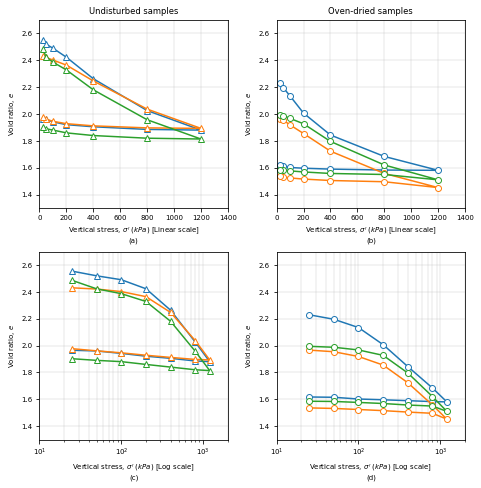

In [13]:
# figure configuration
figure_name = 'figure_10.pdf'
figure_path = os.path.join(save_path, figure_name)
fig_size = [a*b for a,b in zip((1, 3/2),large_fig)]
fig_10, ax_10 = plt.subplots(2, 2, figsize=fig_size)

# gets oedomeer data samples from file
oed_data = pd.read_excel(data, 'oedometer')
# splits data in undisturbed and oven dried
oed_data_u = pd.DataFrame(oed_data[oed_data['type'] == 'u'])
sample_list_u = oed_data_u['sample'].unique()
oed_data_a = pd.DataFrame(oed_data[oed_data['type'] == 'a'])
sample_list_a = oed_data_a['sample'].unique()

# plots undisturbed results
for sample in sample_list_u:
    sigma = oed_data_u[oed_data_u['sample'] == sample]['stress']
    e = oed_data_u[oed_data_u['sample'] == sample]['e']
    ax_10[1][0].plot(sigma, e,
                     marker = '^',
                     markerfacecolor='white',
                     label='Undisturbed')
    ax_10[0][0].plot(sigma, e,
                     marker = '^',
                     markerfacecolor='white',
                     label='Undisturbed')

# plots oven dried results   
for sample in sample_list_a:
    sigma = oed_data_a[oed_data_a['sample'] == sample]['stress']
    e = oed_data_a[oed_data_a['sample'] == sample]['e']
    ax_10[1][1].plot(sigma, e,
                     marker = 'o',
                     markerfacecolor='white',
                     label='Oven-dried')
    ax_10[0][1].plot(sigma, e,
                     marker = 'o',
                     markerfacecolor='white',
                     label='Oven-dried')

# configures figure aspect
# grid lines
ax_10[0][0].grid(which='both', linewidth = 0.3)
ax_10[1][0].grid(which='both', linewidth = 0.3)
ax_10[0][1].grid(which='both', linewidth = 0.3)
ax_10[1][1].grid(which='both', linewidth = 0.3)

ax_10[1][0].set(xscale = 'log', 
                xlabel = "Vertical stress, $\sigma'$ $(kPa)$ [Log scale]\n(c)",
                ylabel = "Void ratio, $e$",
                xlim = [10, 2000],
                ylim = [1.3, 2.7],
                xticks = [0.1, 1, 10, 100, 10000])

ax_10[0][0].set(xscale = 'linear', 
                xlabel = "Vertical stress, $\sigma'$ $(kPa)$ [Linear scale]\n(a)",
                ylabel = "Void ratio, $e$",
                title = 'Undisturbed samples',
                xlim = [0, 1400],
                ylim = [1.3, 2.7],
                xticks = [0.1, 1, 10, 100, 10000])

ax_10[1][1].set(xscale = 'log', 
                xlabel = "Vertical stress, $\sigma'$ $(kPa)$ [Log scale]\n(d)",
                ylabel = "Void ratio, $e$",
                xlim = [10, 2000],
                ylim = [1.3, 2.7],
                xticks = [0.1, 1, 10, 100, 10000])

ax_10[0][1].set(xscale = 'linear', 
                xlabel = "Vertical stress, $\sigma'$ $(kPa)$ [Linear scale]\n(b)",
                ylabel = "Void ratio, $e$",
                title = 'Oven-dried samples',
                xlim = [0, 1400],
                ylim = [1.3, 2.7],
                xticks = [0.1, 1, 10, 100, 10000])

fig_10.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)

if generate_pdf:
    fig_10.savefig(figure_path)
    print('\n--- Figure saved to pdf on {} ---'.format(figure_path))
else:
    print('\n--- PDF saving deactivated ---'.format(figure_path))

print('\n--- Figure preview ---\n')
fig_10.show()

# Figure 11: Consolidation curves


--- Figure saved to pdf on /content/figures/figure_11.pdf ---

--- Figure preview ---



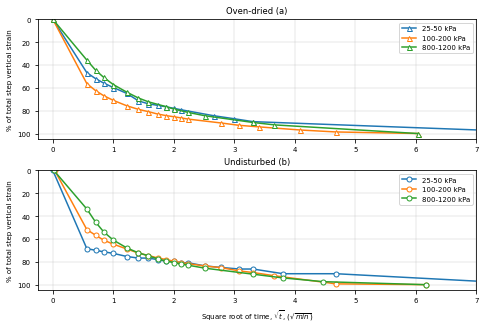

In [14]:
# figure configuration
figure_name = 'figure_11.pdf'
figure_path = os.path.join(save_path, figure_name)
fig_11, ax_11 = plt.subplots(2, 1, figsize=large_fig)

# gets classification data from file
cv_data = pd.read_excel(data, 'cv')
# splits data on oven¡dried (a) and undisturbed (u)
cv_data_a = cv_data[cv_data['type'] == 'a']
cv_data_u = cv_data[cv_data['type'] == 'u']

# Plots ovendried cv data
for sample in cv_data_a['sample'].unique():
    stress_step = sample.split('.')[0].split('-')
    label = stress_step[0] + '-' + stress_step[1] + ' kPa'
    ax_11[0].plot(np.sqrt(cv_data_a[cv_data_a['sample'] == sample]['sqrt(t)']), 
                  cv_data_a[cv_data_a['sample'] == sample]['%settlement']*100, 
                  '^-', label=label, markerfacecolor='white', markersize = 5)
    
# Plots undisturbed cv data
for sample in cv_data_u['sample'].unique():
    stress_step = sample.split('.')[0].split('-')
    label = stress_step[0] + '-' + stress_step[1] + ' kPa'
    ax_11[1].plot(np.sqrt(cv_data_u[cv_data_u['sample'] == sample]['sqrt(t)']), 
                  cv_data_u[cv_data_u['sample'] == sample]['%settlement']*100, 
                  'o-', label=label, markerfacecolor='white', markersize = 5)

ax_11[0].set(ylim = [105, 0], xlim = [-0.25, 7],
             title='Oven-dried (a)',
             ylabel = r'% of total step vertical strain')
ax_11[1].set(ylim = [105, 0], xlim = [-0.25, 7],
             title='Undisturbed (b)',
             ylabel = r'% of total step vertical strain',
             xlabel = r'Square root of time, $\sqrt{t}$, ($\sqrt{min}$)')

ax_11[0].grid(linewidth=0.3)
ax_11[1].grid(linewidth=0.3)

ax_11[0].legend(loc = 'upper right')
ax_11[1].legend(loc = 'upper right')

fig_11.tight_layout(pad=0.75)

if generate_pdf:
    fig_11.savefig(figure_path)
    print('\n--- Figure saved to pdf on {} ---'.format(figure_path))
else:
    print('\n--- PDF saving deactivated ---'.format(figure_path))

print('\n--- Figure preview ---\n')
fig_11.show()

# Figure 12: UCT box plot results


--- Undisturbed ---
Undisturbed mean: 36.33080820948337
Undisturbed std: 7.946165127789787

--- Oven dried ---
Oven-dried mean: 8.77258881811748
Oven-dried std: 3.874483695965971

--- Figure saved to pdf on /content/figures/figure_12.pdf ---

--- Figure preview ---



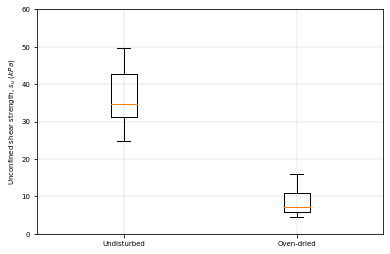

In [15]:
# figure configuration
figure_name = 'figure_12.pdf'
figure_path = os.path.join(save_path, figure_name)
fig_12, ax_12 = plt.subplots(figsize=medium_fig)

# gets classification data from file
uct_data = pd.read_excel(data, 'UCT')
# splits data in undisturbed and oven dried
uct_u = uct_data[uct_data['type'] == 'u']['su']
uct_a = uct_data[uct_data['type'] == 'a']['su']

# Result calculation
print('\n--- Undisturbed ---')
print('Undisturbed mean: {}'.format(np.mean(uct_u)))
print('Undisturbed std: {}'.format(np.std(uct_u)))
print('\n--- Oven dried ---')
print('Oven-dried mean: {}'.format(np.mean(uct_a)))
print('Oven-dried std: {}'.format(np.std(uct_a)))
uct = [uct_u, uct_a]

# plots data
bp = ax_12.boxplot(uct)
ax_12.set(xticklabels = ['Undisturbed', 'Oven-dried'],
       ylabel = 'Unconfined shear strength, $s_u$ $(kPa)$',
       ylim = [0,60]) 

# configures figure aspect
ax_12.grid(linewidth=0.3)
fig_12.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)

if generate_pdf:
    fig_12.savefig(figure_path)
    print('\n--- Figure saved to pdf on {} ---'.format(figure_path))
else:
    print('\n--- PDF saving deactivated ---'.format(figure_path))

print('\n--- Figure preview ---\n')
fig_12.show()

# Figure 13: Direct Shear curves


--- Figure saved to pdf on /content/figures/figure_13.pdf ---

--- Figure preview ---



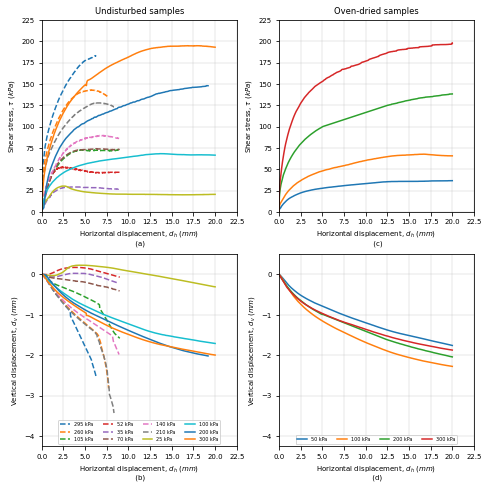

In [16]:
# figure configuration
figure_name = 'figure_13.pdf'
figure_path = os.path.join(save_path, figure_name)
fig_size = [a*b for a,b in zip((1, 3/2),large_fig)]
fig_13, ax_13 = plt.subplots(2, 2, figsize=fig_size)

# gets direct shear data samples from file
ds_data = pd.read_excel(data, 'ds')
# splits data in undisturbed and oven dried
ds_u_data = pd.DataFrame(ds_data[ds_data['type']== 'u']).dropna()
ds_a_data = pd.DataFrame(ds_data[ds_data['type']== 'a']).dropna()
# gets unique values of sigma
sigma_list_u = ds_u_data['sigma'].unique()
sigma_list_a = ds_a_data['sigma'].unique()

# plots undisturbed results
for sigma in sigma_list_u:
    
    sample_list = ds_u_data[ds_u_data['sigma'] == sigma]['sample'].unique()
    for sample in sample_list:
        shape = ds_u_data[(ds_u_data['sigma'] == sigma) & (ds_u_data['sample'] == sample)]['shape'].unique()
        if shape == 'Cil':
            line = '--'
        else:
            line = '-'
        disp_h =  ds_u_data[(ds_u_data['sigma'] == sigma) & (ds_u_data['sample'] == sample)]['h_def']
        tau =  ds_u_data[(ds_u_data['sigma'] == sigma) & (ds_u_data['sample'] == sample)]['stress']
        disp_v = ds_u_data[(ds_u_data['sigma'] == sigma) & (ds_u_data['sample'] == sample)]['v_def']
        if len(disp_h) > 1:
            ax_13[0][0].plot(disp_h, tau, line, label='{0:.0f} kPa'.format(round(sigma, 0)))
            ax_13[1][0].plot(disp_h, disp_v, line, label='{0:.0f} kPa'.format(round(sigma, 0)))

# plots oven dried results
for sigma in sigma_list_a:
    sample_list = ds_a_data[ds_a_data['sigma'] == sigma]['sample'].unique()
    for sample in sample_list:
        disp_h =  ds_a_data[(ds_a_data['sigma'] == sigma) & (ds_a_data['sample'] == sample)]['h_def']
        tau =  ds_a_data[(ds_a_data['sigma'] == sigma) & (ds_a_data['sample'] == sample)]['stress']
        disp_v = ds_a_data[(ds_a_data['sigma'] == sigma) & (ds_a_data['sample'] == sample)]['v_def']
        ax_13[0][1].plot(disp_h, tau, label='{0:.0f} kPa'.format(round(sigma, 0)))
        ax_13[1][1].plot(disp_h, disp_v, label='{0:.0f} kPa'.format(round(sigma, 0)))

# shows legends    
ax_13[1][0].legend(loc='lower center',
                   shadow=False,
                   fontsize='x-small',
                   ncol=4)

ax_13[1][1].legend(loc='lower center',
                   shadow=False,
                   fontsize='x-small',
                   ncol=4)

# configure figure aspect
ax_13[0][0].set(title = 'Undisturbed samples',
                ylabel = r'Shear stress, $\tau$ $(kPa)$',
                xlabel = r'Horizontal displacement, $d_h$ $(mm)$'+'\n (a)',
                xlim = [0,22.5],
                ylim = [0, 225])

ax_13[1][0].set(xlabel = r'Horizontal displacement, $d_h$ $(mm)$'+'\n (b)',
                ylabel = r'Vertical displacement, $d_v$ $(mm)$',
                xlim = [0,22.5],
                ylim = [-4.25, 0.5])

ax_13[0][1].set(title = 'Oven-dried samples',
                ylabel = r'Shear stress, $\tau$ $(kPa)$',
                xlabel = r'Horizontal displacement, $d_h$ $(mm)$'+'\n (c)',
                xlim = [0,22.5],
                ylim = [0, 225])

ax_13[1][1].set(xlabel = r'Horizontal displacement, $d_h$ $(mm)$'+'\n (d)',
                ylabel = r'Vertical displacement, $d_v$ $(mm)$',
                xlim = [0,22.5],
                ylim = [-4.25, 0.5])

ax_13[0][0].grid(linewidth=0.3)
ax_13[1][0].grid(linewidth=0.3)
ax_13[0][1].grid(linewidth=0.3)
ax_13[1][1].grid(linewidth=0.3)

fig_13.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)

if generate_pdf:
    fig_13.savefig(figure_path)
    print('\n--- Figure saved to pdf on {} ---'.format(figure_path))
else:
    print('\n--- PDF saving deactivated ---'.format(figure_path))

print('\n--- Figure preview ---\n')
fig_13.show()

# Figure 14: Direct shear Mohr plane


--- Undisturbed fit ---
Cohesion unaltered: 18.682364464400763
Friction angle unaltered: 28.956283451266604
R^2 (unaltered): 0.9616587209478816

--- Oven dried fit ---
Cohesion unaltered: 4.319432533393467
Friction angle unaltered: 33.09893062297417
R^2 (oven-dried): 0.9987458824095158

--- Figure saved to pdf on /content/figures/figure_14.pdf ---

--- Figure preview ---



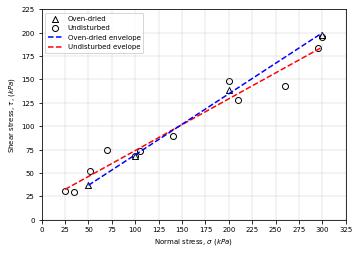

In [17]:
# figure configuration
figure_name = 'figure_14.pdf'
figure_path = os.path.join(save_path, figure_name)
fig_14, ax_14 = plt.subplots(figsize=medium_fig)

# gets direct shear data samples from file
ds_data = pd.read_excel(data, 'ds')
sample_list = ds_data['sample'].unique()

ds_a_sigma = []
ds_a_tau = []
ds_u_sigma = []
ds_u_tau = []

for sample in sample_list:
    if sample:
        sigma_list = ds_data[ds_data['sample'] == sample]['sigma'].unique()
        for sigma in sigma_list:
            sample_type = ds_data[(ds_data['sample'] == sample) & (ds_data['sigma'] == sigma)]['type'].unique()[0]
            data_plot = ds_data[(ds_data['sample'] == sample) & (ds_data['sigma'] == sigma)]
            tau = max(data_plot['stress'])
            if sample_type == 'u':
                label = 'Undisturbed'
                marker = 'o'
                ds_u_sigma.append(sigma)
                ds_u_tau.append(tau)
            else:
                label = 'Oven-dried'
                marker = '^'
                ds_a_sigma.append(sigma)
                ds_a_tau.append(tau)

            ax_14.scatter(sigma, tau,
                          marker=marker,
                          facecolors='white',
                          edgecolors = 'k',
                          label=label,
                          color = 'k')
            
ds_a_sigma = np.array(ds_a_sigma)
ds_a_tau = np.array(ds_a_tau)
ds_u_sigma = np.array(ds_u_sigma)
ds_u_tau = np.array(ds_u_tau)

ds_all_sigma = np.append(ds_a_sigma, ds_u_sigma)
ds_all_tau = np.append(ds_a_tau, ds_u_tau)
 
# Regressions
# Unaltered
reg_u = stats.linregress(ds_u_sigma, ds_u_tau)
plot_reg_u_sigma = [min(ds_u_sigma), max(ds_u_sigma)]
plot_reg_u_tau = [reg_u.intercept + min(ds_u_sigma) * reg_u.slope,
                  reg_u.intercept + max(ds_u_sigma) * reg_u.slope]
ax_14.plot(plot_reg_u_sigma, plot_reg_u_tau,
        '--r',
        label='Undisturbed evelope')
print('\n--- Undisturbed fit ---')
print('Cohesion unaltered: {}'.format(reg_u.intercept))
print('Friction angle unaltered: {}'.format(np.degrees(np.arctan(reg_u.slope))))
print('R^2 (unaltered): {}'.format(reg_u.rvalue**2))

# Oven dried
reg_a = stats.linregress(ds_a_sigma, ds_a_tau)
plot_reg_a_sigma = [min(ds_a_sigma), max(ds_a_sigma)]
plot_reg_a_tau = [reg_a.intercept + min(ds_a_sigma) * reg_a.slope,
                  reg_a.intercept + max(ds_a_sigma) * reg_a.slope]
ax_14.plot(plot_reg_a_sigma, plot_reg_a_tau,
          '--b',
          label='Oven-dried envelope')

print('\n--- Oven dried fit ---')
print('Cohesion unaltered: {}'.format(reg_a.intercept))
print('Friction angle unaltered: {}'.format(np.degrees(np.arctan(reg_a.slope))))
print('R^2 (oven-dried): {}'.format(reg_a.rvalue**2))

handles, labels = ax_14.get_legend_handles_labels()
labels.reverse()
handles.reverse()
by_label = OrderedDict(zip(labels, handles))
ax_14.legend(by_label.values(), by_label.keys(), loc = 'upper left')

max_tau = 225
max_sigma = 325

ax_14.grid(linewidth=0.3)
ax_14.set(xlim = [0, max_sigma],
          ylim = [0, max_tau],
          aspect = 'equal',
          xticks = np.arange(0,max_sigma+1, 25),
          yticks = np.arange(0,max_tau+1, 25),
          xlabel = r'Normal stress, $\sigma$ $(kPa)$',
          ylabel = r'Shear stress, $\tau$, $(kPa)$')

fig_14.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)

if generate_pdf:
    fig_14.savefig(figure_path)
    print('\n--- Figure saved to pdf on {} ---'.format(figure_path))
else:
    print('\n--- PDF saving deactivated ---'.format(figure_path))

print('\n--- Figure preview ---\n')
fig_14.show()

# Zip figures

In [18]:
if generate_zip:
    !zip -r $save_zip $save_path

  adding: content/figures/ (stored 0%)
  adding: content/figures/figure_04.pdf (deflated 36%)
  adding: content/figures/figure_06.pdf (deflated 38%)
  adding: content/figures/figure_03.pdf (deflated 31%)
  adding: content/figures/figure_11.pdf (deflated 37%)
  adding: content/figures/figure_05.pdf (deflated 37%)
  adding: content/figures/figure_02_a.png (deflated 0%)
  adding: content/figures/figure_12.pdf (deflated 37%)
  adding: content/figures/figure_13.pdf (deflated 13%)
  adding: content/figures/figure_10.pdf (deflated 38%)
  adding: content/figures/figure_02_b.png (deflated 0%)
  adding: content/figures/figure_07.pdf (deflated 33%)
  adding: content/figures/figure_08.pdf (deflated 25%)
  adding: content/figures/figure_09.pdf (deflated 31%)
  adding: content/figures/figure_14.pdf (deflated 32%)
  adding: content/figures/figure_01.jpg (deflated 25%)
